In [1]:
import math
import numpy as np
import pygame
import sympy

t = sympy.symbols("t")
k = sympy.symbols("k")
m = sympy.symbols("m")
x0 = sympy.symbols("x0")
v0 = sympy.symbols("v0")
# Making all variables global variables for now
# We can specify certain ones as constants later

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def fig2array(fig=None):
    return np.fromstring(
        fig.canvas.tostring_rgb(),
        dtype=np.uint8, sep=''
    ).reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [3]:
class MainEquations:
    def __init__(self):
        self.w = sympy.sqrt(k/m)
        self.phi = sympy.atan2(x0, v0)
        self.amplitude = sympy.sqrt(x0**2 + v0**2)
        
        self.frequency = self.w / (2*sympy.pi)
        self.phase_shift = self.phi / self.w
        
        #                   [x0 * cos(w*t)] + [v0 * sin(w*t)]
        self.position_equation = x0*sympy.cos(self.w*t) + v0*sympy.sin(self.w*t)
    
    def get_position_equation(self):
        return self.position_equation
    
    def get_position_alternate(self):
        """
        amplitude * sin(phi + w*t)
        :return: position (meters)
        """
        position = self.amplitude*(math.sin(self.phi + self.w*t))
        return position

In [4]:
equation_set_1 = MainEquations()
position_equation = equation_set_1.get_position_equation()
# Creating an equation from functions above

v0*sin(t*sqrt(k/m)) + x0*cos(t*sqrt(k/m))


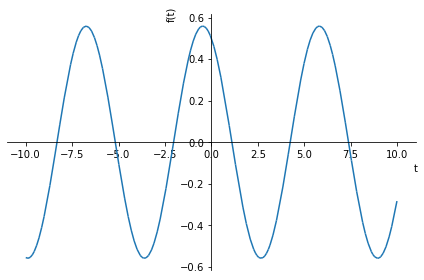

(288, 432, 3)


c:\users\melgiri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


In [5]:
# Substituting some of the variables in a "dummy equation"
simp_eqn = position_equation.subs(k, 1.0).subs(x0, 0.5).subs(v0, -0.25).subs(m, 1).simplify()
print(position_equation)
# Calling a member of a protected series, ignore any IDE warnings.
fig = sympy.plot(simp_eqn, backend="matplotlib")._backend.fig
fig.canvas.draw()
data = fig2array(fig=fig)
print(np.shape(data))

In [6]:
# Lemme try out something new
s = sympy.Function("t")
print(type(position_equation))

<class 'sympy.core.add.Add'>


In [7]:
type(fig)

matplotlib.figure.Figure

In [8]:
v0

v0

In [9]:
position_equation

v0*sin(t*sqrt(k/m)) + x0*cos(t*sqrt(k/m))

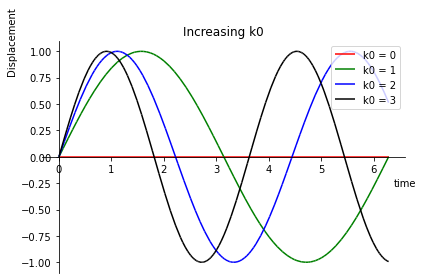

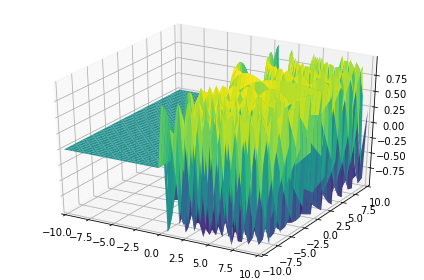

NameError: name 'plot2d' is not defined

In [10]:
from sympy import plot

v0_values = [0, 1, 2, 3]
k_values = [0, 1, 2, 3]
m_values = [0, 1, 2, 3]
x0_values = [0, 1, 2, 3]

v0_def = 1
k_def = 1
m_def = 1
x0_def = 0

def plot_these(eqn_base, eqns, colors, name):
    plt = plot(eqns[0], (t, 0, 2*sympy.pi), line_color=colors[0], legend=True, label="{} = 0".format(name), show=False)
    plt.extend(plot(eqns[1], (t, 0, 2*sympy.pi), line_color=colors[1], legend=True, label="{} = 1".format(name), show=False))
    plt.extend(plot(eqns[2], (t, 0, 2*sympy.pi), line_color=colors[2], legend=True, label="{} = 2".format(name), show=False))
    plt.extend(plot(eqns[3], (t, 0, 2*sympy.pi), line_color=colors[3], legend=True, label="{} = 3".format(name), show=False))
    plt.title = "Increasing {}".format(name)
    plt.ylabel = "Displacement"
    plt.xlabel = "time"
    
    plt_seperate = []
    for eqn in eqns:
        plt_seperate_graph = plot(eqn, (t, 0, 2*sympy.pi), line_color=colors[0], legend=False, show=False)
        plt_seperate_graph.title = "Increasing {}".format(name)
        plt_seperate_graph.ylabel = "Displacement"
        plt_seperate_graph.xlabel = "time"
        plt_seperate.append(plt_seperate_graph)
    
    plt3d = sympy.plotting.plot3d(eqn_base, show=False)
    return plt, plt3d, plt_seperate

plots_2d = []
plots_3d = []

name = "k0"
colors = ["r", "g", "b", "k"]
eqns = []
eqn_base = position_equation.subs(x0, x0_def).subs(m, m_def).subs(v0, v0_def)
for k_value in k_values:
    eqns.append(eqn_base.subs(k, k_value))
    
plot_2d, plot_3d, plt_seperate = plot_these(eqn_base=eqn_base, eqns=eqns, colors=colors, name=name)

plot_2d.show()
plot_3d.show()

plot2d.save("D:\\Data\\203-project\\time-k-graph")

In [11]:
eqn2 = position_equation.subs(k, k_def).subs(m, m_def).subs(x0, x0_def)
print(eqn2)
print(position_equation)

v0*sin(t)
v0*sin(t*sqrt(k/m)) + x0*cos(t*sqrt(k/m))


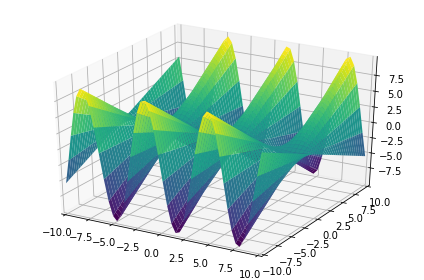

In [12]:
plt3d = sympy.plotting.plot3d(eqn2)

In [13]:
position_equation

v0*sin(t*sqrt(k/m)) + x0*cos(t*sqrt(k/m))

In [14]:
new_eqn = position_equation.subs(k, 8).subs(m, 2).subs(x0, +4).subs(v0, +6)
new_eqn

6*sin(2*t) + 4*cos(2*t)

In [15]:
sympy.print_latex(new_eqn)

6 \sin{\left(2 t \right)} + 4 \cos{\left(2 t \right)}


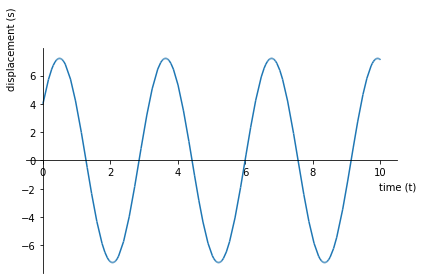

In [16]:
sympy.plot(new_eqn, (t, 0, 10), xlabel="time (t)", ylabel="displacement (s)")

In [17]:
o = sympy.symbols("phi")
o

phi

In [18]:
w = sympy.Function("omega")(k, m)

In [19]:
w = k/m

In [20]:
w

k/m

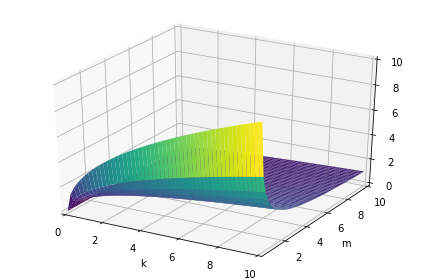

In [21]:
sympy.plotting.plot3d(equation_set_1.w, (k, 0, 10), (m, 0.1, 10), xlabel="k", ylabel="m")

In [22]:
Xmax = sympy.exp(-v0 / (v0 + (x0*sympy.sqrt(k*m)/m)))*(x0 + (v0*m)/(sympy.sqrt(k*m)))

In [25]:
Xmax

(m*v0/sqrt(k*m) + x0)*exp(-v0/(v0 + x0*sqrt(k*m)/m))

In [26]:
Xg = sympy.exp(-t)-20*sympy.exp(-2*t)

In [41]:
sympy.latex(Xg)

'e^{- t} - 20 e^{- 2 t}'

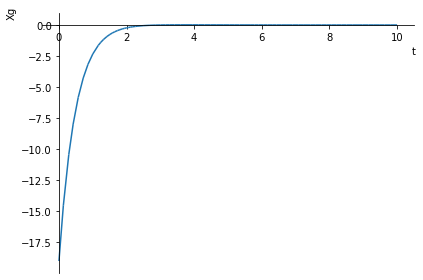

In [33]:
sympy.plotting.plot(Xg, (t, 0, 10), ylabel="Xg")

In [40]:
w = sympy.Function("omega")(equation_set_1.w)

omega(sqrt(k/m))


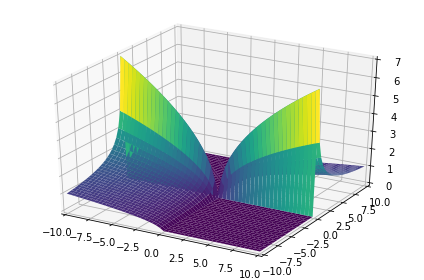

In [38]:
sympy.plotting.plot3d(equation_set_1.w, (k, 0, 10))

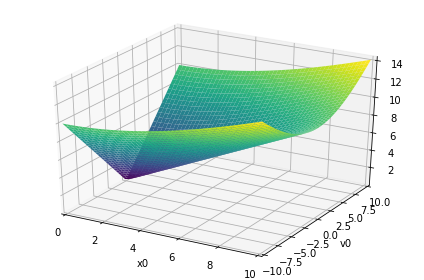

In [51]:
sympy.plotting.plot3d(equation_set_1.amplitude, (x0, 0, 10), (v0, -10, 10), xlabel="x0", ylabel="v0")

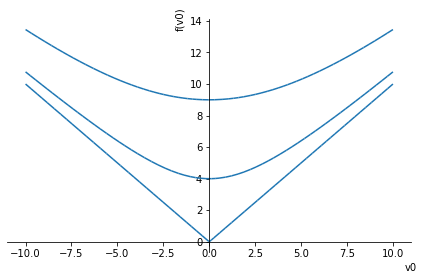

In [50]:
sympy.plotting.plot((equation_set_1.amplitude.subs(x0, 9)),(equation_set_1.amplitude.subs(x0, 0)),(equation_set_1.amplitude.subs(x0, 4)))

In [52]:
sympy.latex(equation_set_1.amplitude)

'\\sqrt{v_{0}^{2} + x_{0}^{2}}'

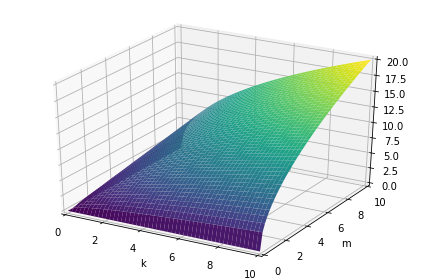

In [55]:
sympy.plotting.plot3d(sympy.sqrt(4*k*m), (k, 0, 10), (m, 0, 10), xlabel="k", ylabel="m")

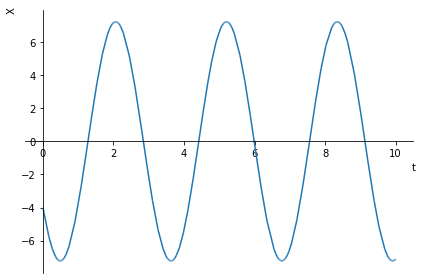

In [57]:
sympy.plotting.plot(7.221*sympy.sin(3.73 + 2*t), (t, 0, 10), ylabel="X")

In [58]:
sympy.latex(7.221*sympy.sin(3.73 + 2*t))

'7.221 \\sin{\\left(2 t + 3.73 \\right)}'

In [90]:
eqn2 = sympy.exp(-sympy.sqrt(k*m)*t/m)*(x0+(v0+(sympy.sqrt(k*m)*x0/m))*t)

In [91]:
eqn2

(t*(v0 + x0*sqrt(k*m)/m) + x0)*exp(-t*sqrt(k*m)/m)

In [94]:
q2_eqn = eqn2.subs(m, 2).subs(k, 8).subs(x0, -4).subs(v0, -6)
q2_eqn

(-14*t - 4)*exp(-2*t)

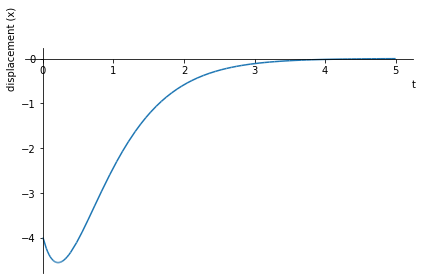

In [95]:
sympy.plotting.plot(q2_eqn, (t, 0, 5), ylabel="displacement (x)")

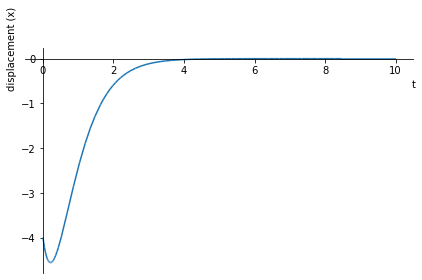

In [82]:
sympy.plotting.plot((-4-14*t)*sympy.exp(-2*t), (t, 0, 10), ylabel="displacement (x)")

In [78]:
(-4-14*t)*sympy.exp(-2*t)

(-14*t - 4)*exp(-2*t)